# Assignment 3 
## Data Preprocessing, PCA, and Modeling

DSCI 6601: Practical Machine Learning

Student: Sahil Khan

Date: 27-Oct-2024
_____________________________________________________________________________________________________________________________________________________________________________________________

### INTRODUCTION

In this assignment, we will explore various data pre-processing techniques followed by applying classification models to make predictions. This assignment will evaluate how data pre-processing and dimensionality reduction using PCA affects the performance of the models. The goal is to build a Decision Tree model for classification. We will evaluate the model’s performance and analyze how the features contribute to the predictions.

Dataset Link: https://www.kaggle.com/datasets/karrrimba/movie-metadatacsv

_____________________________________________________________________________________________________________________________________________________________________________________________

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, f1_score


import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

_____________________________________________________________________________________________________________________________________________________________________________________________

## TASK 1: Data Selection 
- I selected a IMDB Movie Dataset that contains information about the movies released in the past many years. This dataset contains information about the Movie right from the Directors to the Actors involved, Budget in which the film was made to the Gross it earned, movie's content rating, imdb score etc., a real-world dataset which contains required samples and features for the assignment.

In [2]:
movieData = pd.read_csv('movie_metadata.csv')
movieData.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


- No.of Features and Samples

In [3]:
samples, features = movieData.shape
print(f"Total Number of Features: {features}")
print(f"Total Number of Samples: {samples}")

Total Number of Features: 28
Total Number of Samples: 5043


- Dataset Description

In [4]:
# Name of Feature Columns in the dataset
print("Name of FEATURE COLUMNS:\n","\n".join(colName.title() for colName in movieData.columns if colName!="imdb_score"))

Name of FEATURE COLUMNS:
 Color
Director_Name
Num_Critic_For_Reviews
Duration
Director_Facebook_Likes
Actor_3_Facebook_Likes
Actor_2_Name
Actor_1_Facebook_Likes
Gross
Genres
Actor_1_Name
Movie_Title
Num_Voted_Users
Cast_Total_Facebook_Likes
Actor_3_Name
Facenumber_In_Poster
Plot_Keywords
Movie_Imdb_Link
Num_User_For_Reviews
Language
Country
Content_Rating
Budget
Title_Year
Actor_2_Facebook_Likes
Aspect_Ratio
Movie_Facebook_Likes


In [5]:
# Target Variable
print("TARGET VARIABLE:", "".join(colName.title() for colName in movieData.columns if colName=='imdb_score'))

TARGET VARIABLE: Imdb_Score


In [6]:
# Overall Info
movieData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

_____________________________________________________________________________________________________________________________________________________________________________________________

## TASK 2: Data Preprocessing 

- Dropping Unnecessary Columns

In [7]:
movieData=movieData.drop(['color','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes', 'actor_2_facebook_likes','movie_facebook_likes',
                        'actor_2_name','aspect_ratio','duration', 'facenumber_in_poster','cast_total_facebook_likes','actor_3_name','plot_keywords','movie_imdb_link'],axis=1)

- Handling Missing Values

In [8]:
# Sum of Missing Values per Column
movieData.isnull().sum()

director_name             104
num_critic_for_reviews     50
gross                     884
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
num_user_for_reviews       21
language                   14
country                     5
content_rating            303
budget                    492
title_year                108
imdb_score                  0
dtype: int64

Since our target variable, __imdb_score__, does not contain any null or missing values, we will exclude it from the scaling, imputation, and encoding processes.

Before proceeding, we note that since our target variable is a continuous feature, we can easily build a Decision Tree Regressor. However, I also want to create a Decision Tree Classifier for this assignment. To achieve this, I will introduce a new column, __imdb_rating__, which will categorize scores into three groups: low, medium, and high.

The categories will be defined as follows:
- Low Rating: 0-5
- Medium Rating: 5.1-7.4
- High Rating: 7.5-10

In [9]:
# Create the imdb_rating column based on imdb_score
movieData['imdb_rating'] = pd.cut( movieData['imdb_score'], bins=[-1, 5, 7.4, 10], labels=[0,1,2] )

In [10]:
# Creating New Feature 'PROFIT' where profit = gross - budget
movieData['profit']=movieData['gross'] - movieData['budget']

In [11]:
# Splitting GENRES column taking top3 genre
genres = movieData['genres'].str.split('|',expand=True).iloc[:,0:3]
genres.columns=['genre1','genre2','genre3']

# Merging GENRES column to the base dataframe
movieData = pd.concat([movieData,genres],axis=1)

# Dropping the original 'genres' column
movieData = movieData.drop(columns=['genres'])

movieData[['genre1', 'genre2', 'genre3']] = movieData[['genre1', 'genre2', 'genre3']].replace(['', None], np.nan)


In [12]:
# Separate features and target variable
X = movieData.drop(columns=['imdb_score','imdb_rating'])  # Drop the target variable from features
yRegressor = movieData['imdb_score']                # Assign the target variable for Regressor
yClassifier = movieData['imdb_rating']                # Assign the target variable for Classifier

__The objective of this assignment is to address missing values by filling them in with various imputation techniques, rather than simply dropping the null values. To do this, we’ll first separate the numeric columns from the categorical ones and then apply appropriate imputation methods to each.__

In [13]:
# Seperating numeric columns and Categorical Columns
numericColumns = X.select_dtypes(exclude=['object']).columns
numericData = X[numericColumns]


categoricalColumns = X.select_dtypes(include=['object']).columns
categoricalData = X[categoricalColumns]

- I will utilize the KNN imputer to fill in missing values for numeric data.
- For categorical data, I will apply the simple imputer with the strategy set to 'most frequent' to address missing values.

Before carrying out these imputations, I will scale the numeric data using the standard scaler, since the KNN imputer functions best with scaled data due to its dependence on distance calculations between records. In contrast, scaling or encoding categorical columns is not necessary prior to applying these imputation techniques.

In [14]:
# Applying standard scaler
scaler = StandardScaler()
numericData_scaled = scaler.fit_transform(numericData)

In [15]:
# Apply KNN Imputer to the scaled numeric data
knn_imputer = KNNImputer(n_neighbors=5)
numericData_imputed = knn_imputer.fit_transform(numericData_scaled)

# Convert the imputed data back to a DataFrame
# numericDataImputed_S = pd.DataFrame(numericData_imputed, columns=numericColumns)
numericDataImputed = pd.DataFrame(scaler.inverse_transform(numericData_imputed), columns=numericColumns) # will use this in histogram to visualise before/after knn imputed results


In [16]:
# Applying SimpleImputer to the categorical columns('most_frequent' strategy)
simple_imputer = SimpleImputer(strategy='most_frequent')
categoricalDataImputed = pd.DataFrame(simple_imputer.fit_transform(categoricalData), columns=categoricalColumns)

In [17]:
# Combining the imputed numeric and categorical data
xImputed = pd.concat([numericDataImputed, categoricalDataImputed], axis=1)

In [18]:
# Check if missing values have been imputed
xImputed.isnull().sum()

num_critic_for_reviews    0
gross                     0
num_voted_users           0
num_user_for_reviews      0
budget                    0
title_year                0
profit                    0
director_name             0
actor_1_name              0
movie_title               0
language                  0
country                   0
content_rating            0
genre1                    0
genre2                    0
genre3                    0
dtype: int64

- __Before and After Imputation Visualsation for Numeric Columns__

Numeric Column with maximum number of null values -> profit : 1152


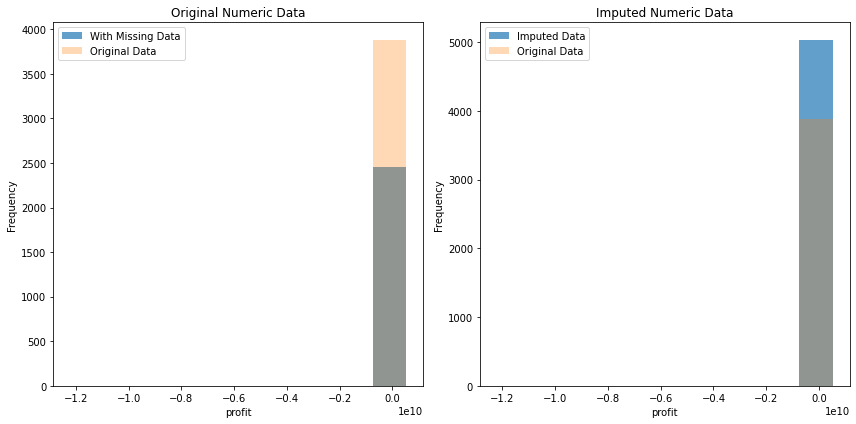

In [19]:
# Numeric Data Visualization

print(f"Numeric Column with maximum number of null values -> {numericData.isnull().sum().idxmax()} : {numericData.isnull().sum().max()}")

def plot_missingness_before_after_numerical(original, missing, imputed, column):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))


    # Ploting the Original data with Missing values
    axes[0].hist(missing[column].dropna(), bins=10,  alpha=0.7, label='With Missing Data')
    axes[0].hist(original[column], bins=10, alpha=0.3, label='Original Data')
    axes[0].set_title('Original Numeric Data')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    axes[0].legend()

    # Ploting the imputed data
    axes[1].hist(imputed[column], bins=10, alpha=0.7, label='Imputed Data')
    axes[1].hist(original[column], bins=10, alpha=0.3, label='Original Data')
    axes[1].set_title('Imputed Numeric Data')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Frequency')
    axes[1].legend()

    # Show the plots
    plt.tight_layout()
    plt.show()


plot_missingness_before_after_numerical(X, X.dropna(), numericDataImputed, numericData.isnull().sum().idxmax())


- __Before and After Imputation Visualsation for Categorical Columns__

Categorical Column with maximum number of null values -> genre3 : 1988


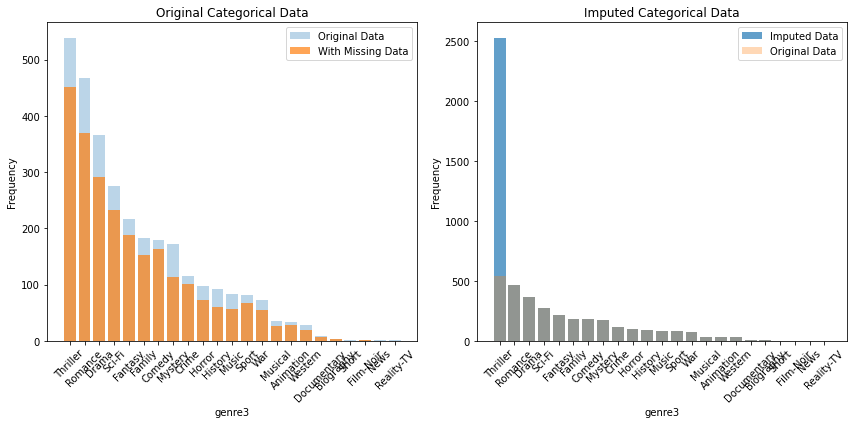

In [20]:
# Numeric Data Visualization

print(f"Categorical Column with maximum number of null values -> {categoricalData.isnull().sum().idxmax()} : {categoricalData.isnull().sum().max()}")

def plot_missingness_before_after_categorical(original, missing, imputed, column):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Count the occurrences of each category in the original data
    original_counts = original[column].value_counts()
    missing_counts = missing[column].value_counts()
    imputed_counts = imputed[column].value_counts()

    # Plotting the Original data with Missing values
    axes[0].bar(original_counts.index.astype(str), original_counts.values, alpha=0.3, label='Original Data')
    axes[0].bar(missing_counts.index.astype(str), missing_counts.values, alpha=0.7, label='With Missing Data')
    axes[0].set_title('Original Categorical Data')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    axes[0].legend()
    axes[0].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

    # Plotting the imputed data
    axes[1].bar(imputed_counts.index.astype(str), imputed_counts.values, alpha=0.7, label='Imputed Data')
    axes[1].bar(original_counts.index.astype(str), original_counts.values, alpha=0.3, label='Original Data')
    axes[1].set_title('Imputed Categorical Data')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    axes[1].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

    # Show the plots
    plt.tight_layout()
    plt.show()


plot_missingness_before_after_categorical(X, X.dropna(), categoricalDataImputed, categoricalData.isnull().sum().idxmax())


_____________________________________________________________________________________________________________________________________________________________________________________________

## TASK 3: Exploratory Analysis and PCA

- STATISTICS SUMMARY

In [21]:
xImputed.describe()

,num_critic_for_reviews,gross,num_voted_users,num_user_for_reviews,budget,title_year,profit
count,5043.000000,5.043000e+03,5.043000e+03,5043.000000,5.043000e+03,5043.000000,5.043000e+03
mean,138.877018,4.227291e+07,8.366816e+04,271.648225,3.738910e+07,2002.359746,4.876615e+06
std,121.712778,6.415510e+07,1.384853e+05,377.594284,1.960183e+08,12.419599,1.989145e+08
min,1.000000,1.620000e+02,5.000000e+00,1.000000,2.180000e+02,1916.000000,-1.221330e+10
25%,48.000000,3.204144e+06,8.593500e+03,64.000000,6.000000e+06,1999.000000,-8.485304e+06
50%,109.000000,1.917000e+07,3.435900e+04,155.000000,1.800000e+07,2005.000000,-2.092902e+05
75%,194.000000,5.330158e+07,9.630900e+04,324.000000,4.000000e+07,2011.000000,1.950000e+07
max,813.000000,7.605058e+08,1.689764e+06,5060.000000,1.221550e+10,2016.000000,5.235058e+08


- Budget, Gross, and Profit are the three most significant columns in analyzing the statistics of this movie dataset. Let's investigate whether there is any correlation among these three columns.

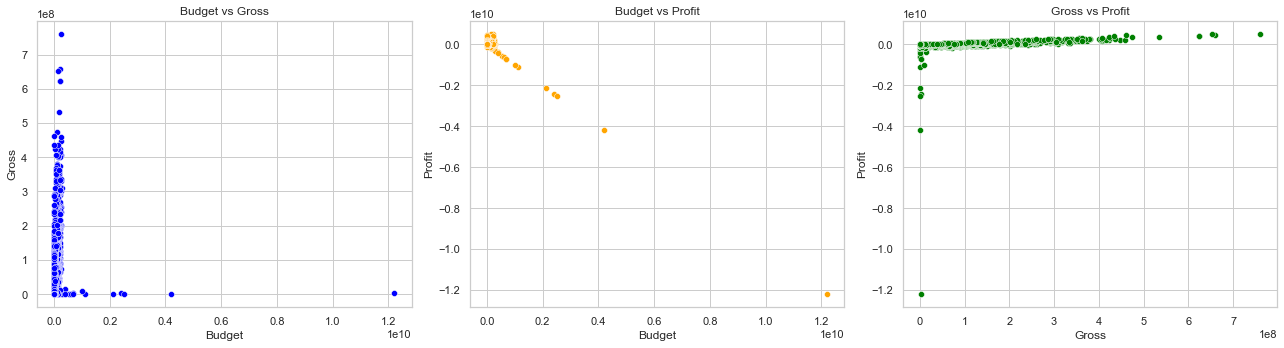

In [22]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Budget vs Gross
sns.scatterplot(data=xImputed, x='budget', y='gross', ax=axs[0], color='blue')
axs[0].set_title('Budget vs Gross')
axs[0].set_xlabel('Budget')
axs[0].set_ylabel('Gross')

# Plot 2: Budget vs Profit
sns.scatterplot(data=xImputed, x='budget', y='profit', ax=axs[1], color='orange')
axs[1].set_title('Budget vs Profit')
axs[1].set_xlabel('Budget')
axs[1].set_ylabel('Profit')

# Plot 3: Gross vs Profit
sns.scatterplot(data=xImputed, x='gross', y='profit', ax=axs[2], color='green')
axs[2].set_title('Gross vs Profit')
axs[2].set_xlabel('Gross')
axs[2].set_ylabel('Profit')

# Show the plots
plt.tight_layout()
plt.show()

Based on the above graphs, we can conclude that:
- Gross revenue does not depend on a movie's budget, as even low-budget movies can achieve high gross revenue and, consequently, high profit.
- There is a negative relationship between budget and profit, indicating that a high budget is not essential for achieving high profit in movies.

Analysis Based on GENRES
- Looking for the Profittable Genre

In [23]:
genreProfit=xImputed.groupby('genre1')[['profit']].mean()
genreProfit.sort_values('profit',ascending=False)

,profit
genre1,
Musical,4.742491e+07
Family,4.383019e+07
Film-Noir,3.749559e+07
Animation,2.643052e+07
Fantasy,1.988056e+07
Horror,1.537655e+07
Adventure,1.537624e+07
Mystery,1.357972e+07
Biography,1.000530e+07


<AxesSubplot:title={'center':'Genre Vs Profit'}, xlabel='Genre', ylabel='Profit'>

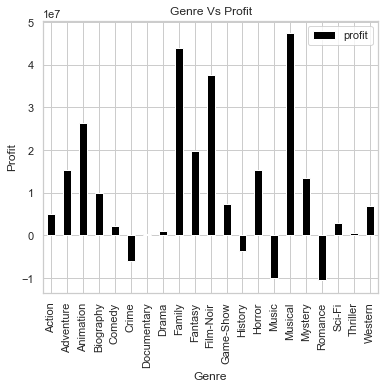

In [24]:
genreProfit.plot(kind='bar', title='Genre Vs Profit', ylabel='Profit',xlabel='Genre', figsize=(6, 5),color='Black')

Therefore, Musical is the most profittable genre among all.

In [25]:
xImputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_critic_for_reviews  5043 non-null   float64
 1   gross                   5043 non-null   float64
 2   num_voted_users         5043 non-null   float64
 3   num_user_for_reviews    5043 non-null   float64
 4   budget                  5043 non-null   float64
 5   title_year              5043 non-null   float64
 6   profit                  5043 non-null   float64
 7   director_name           5043 non-null   object 
 8   actor_1_name            5043 non-null   object 
 9   movie_title             5043 non-null   object 
 10  language                5043 non-null   object 
 11  country                 5043 non-null   object 
 12  content_rating          5043 non-null   object 
 13  genre1                  5043 non-null   object 
 14  genre2                  5043 non-null   

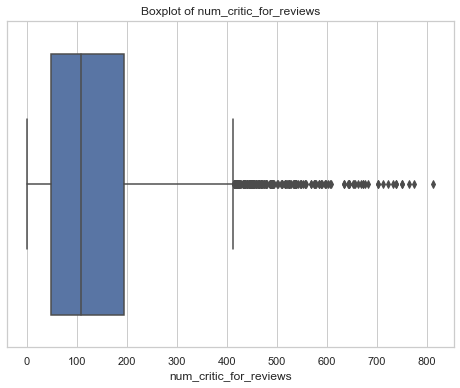

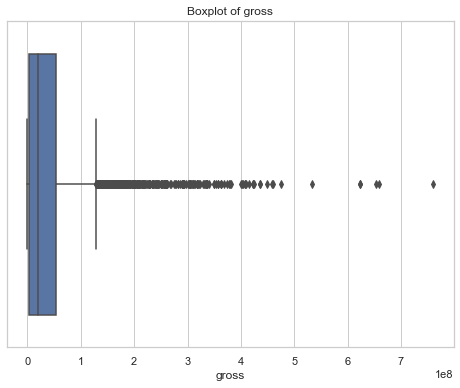

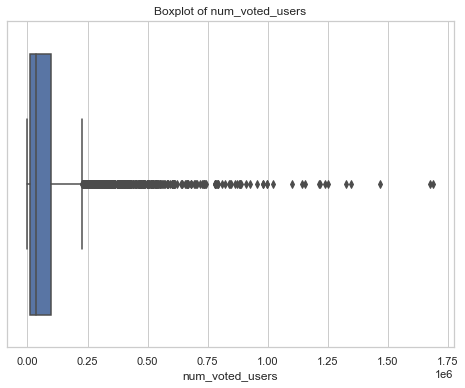

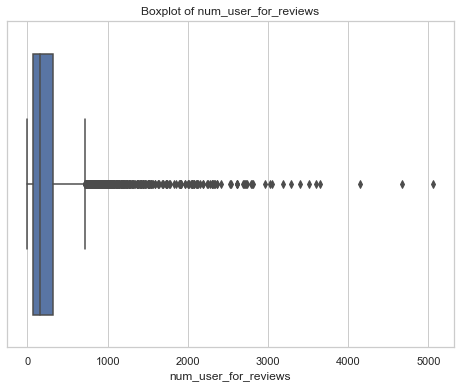

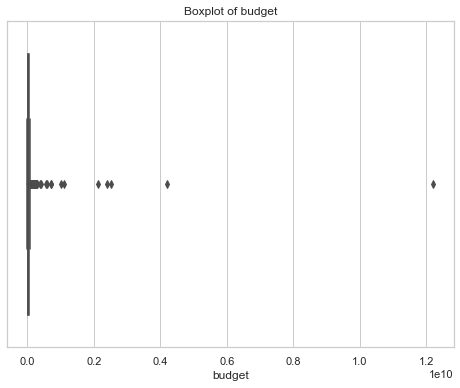

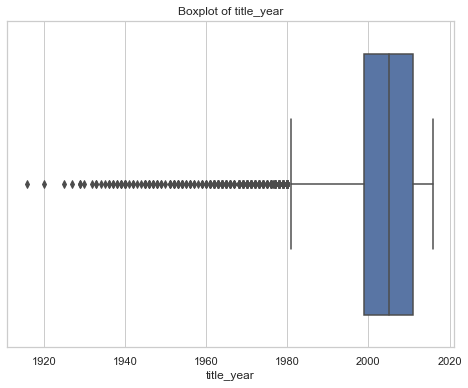

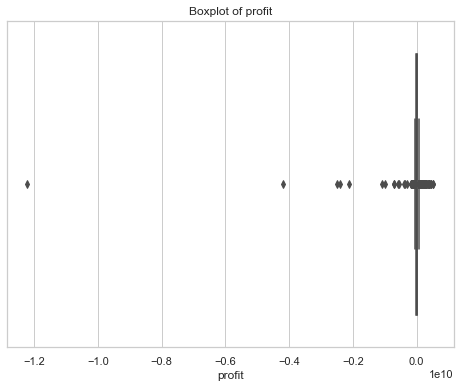

In [26]:
for column in xImputed.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=xImputed[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

Now, I will encode the categorical features to facilitate the correlation analysis results.

In [27]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the encoder to the selected categorical columns
xImputedTemp = encoder.fit_transform(xImputed[categoricalColumns])

# Create a DataFrame with the encoded columns
xImputedDF = pd.DataFrame(xImputedTemp, columns=encoder.get_feature_names_out(categoricalColumns))

# Concatenate the original dataframe with the encoded columns
xImputedEncoded = pd.concat([xImputed, xImputedDF], axis=1)

# Drop original categorical columns
xImputedEncoded = xImputedEncoded.drop(columns=categoricalColumns)

In [28]:
xImputedEncoded.shape

(5043, 9607)

In [29]:
xImputedEncoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Columns: 9607 entries, num_critic_for_reviews to genre3_Western
dtypes: float64(9607)
memory usage: 369.6 MB


Correlation Matrix:


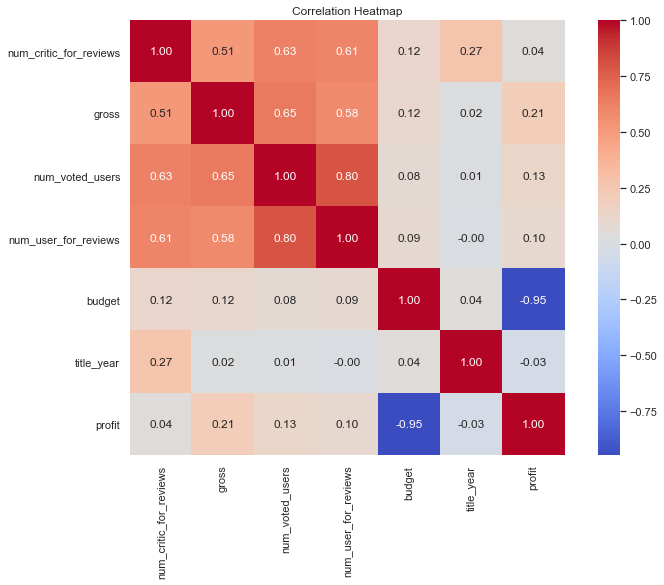

In [30]:
# Computing correlation matrix for numric data only for xImputed
correlation_matrix = xImputed.select_dtypes(include='float64').corr()

# Display the correlation matrix
print("Correlation Matrix:")

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

Likewise, performing correlation analysis on the __xImputedEncoded__ DataFrame will take an excessive amount of time due to its 5,043 entries and 9,607 columns. Therefore, we will apply Principal Component Analysis (PCA) for dimensionality reduction to assist with feature selection.

Before performing PCA, it’s essential to understand how much variance each principal component captures. This helps determine the optimal number of components.

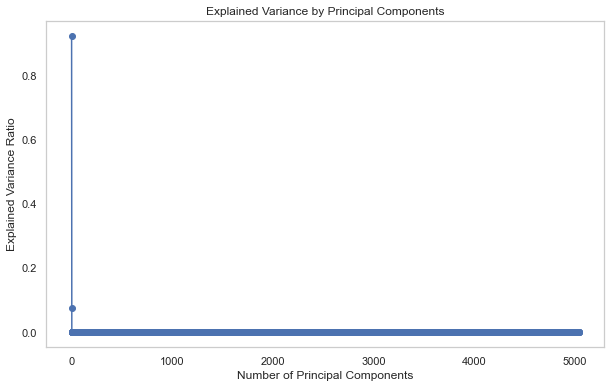

In [31]:
# Fit PCA on the original dataset
pca = PCA()
pca.fit(xImputedEncoded)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

Split the original dataset for regressor and classifier

In [32]:
X_trainReg, X_testReg, y_trainReg, y_testReg = train_test_split(xImputedEncoded, yRegressor, test_size=0.2, random_state=42)
X_trainClass, X_testClass, y_trainClass, y_testClass = train_test_split(xImputedEncoded, yClassifier, test_size=0.2, random_state=42)

Training Models on Original and PCA-reduced Datasets

In [33]:
# Decision Tree Regressor on original data
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_trainReg, y_trainReg)
y_pred_reg = dt_regressor.predict(X_testReg)

# Evaluation for regression
mse_reg = mean_squared_error(y_testReg, y_pred_reg)
r2_reg = r2_score(y_testReg, y_pred_reg)

print(f'Regression MSE (Original): {mse_reg}')
print(f'Regression R-squared (Original): {r2_reg}')

Regression MSE (Original): 1.0381367690782954
Regression R-squared (Original): 0.2421563727825986


- PCA [starting with n=50]

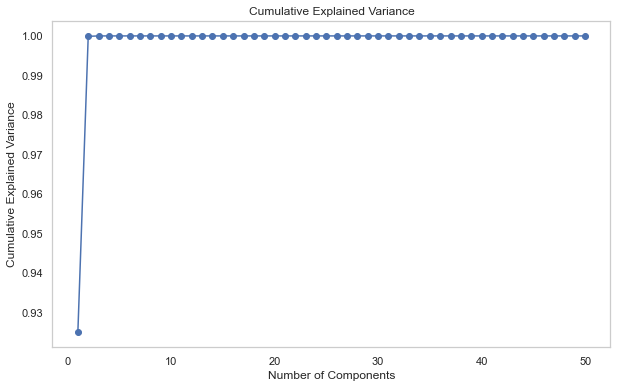

In [34]:
pca = PCA(n_components=50)  
X_pca = pca.fit_transform(xImputedEncoded)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

The plot strongly suggests that we can significantly reduce the number of components in our PCA. Since the first component explains nearly 100% of the variance, we can achieve a similar level of representation with a much smaller number of components.

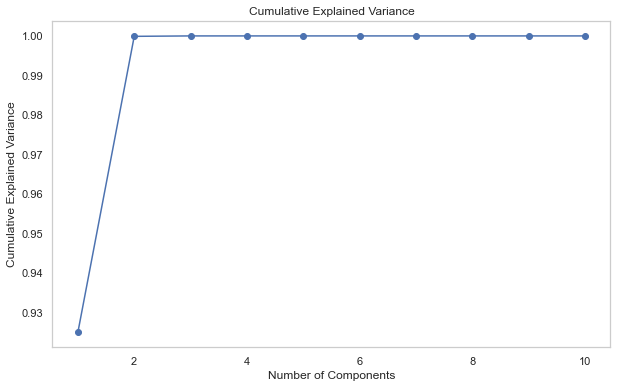

In [35]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(xImputedEncoded)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

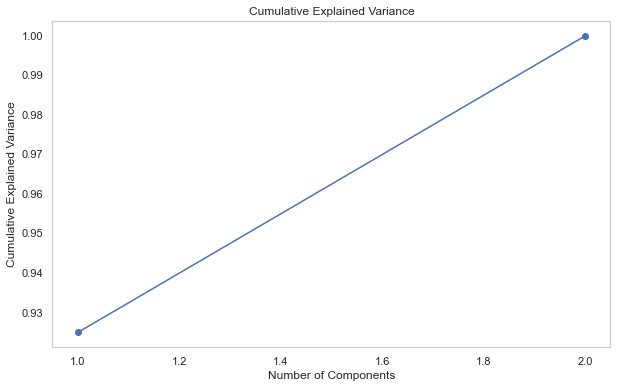

In [36]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(xImputedEncoded)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

Therefore, optimal number for n is 2

In [37]:
pcaReg = PCA(n_components=2)
X_train_pca_reg = pcaReg.fit_transform(X_trainReg)
X_test_pca_reg = pcaReg.transform(X_testReg)

# Decision Tree Regressor on PCA data
dt_regressor_pca = DecisionTreeRegressor(random_state=42)
dt_regressor_pca.fit(X_train_pca_reg, y_trainReg)
y_pred_reg_pca = dt_regressor_pca.predict(X_test_pca_reg)

# Evaluation for PCA regression
mse_reg_pca = mean_squared_error(y_testReg, y_pred_reg_pca)
r2_reg_pca = r2_score(y_testReg, y_pred_reg_pca)

print(f'Regression MSE (PCA): {mse_reg_pca}')
print(f'Regression R-squared (PCA): {r2_reg_pca}')

Regression MSE (PCA): 2.557413280475719
Regression R-squared (PCA): -0.8669210209078926


In [39]:
# Decision Tree Classifier on original data
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_trainClass, y_trainClass)
y_pred_class = dt_classifier.predict(X_testClass)

# Evaluation for classification
accuracy_class = accuracy_score(y_testClass, y_pred_class)
precision_class = precision_score(y_testClass, y_pred_class, average='weighted')
f1_class = f1_score(y_testClass, y_pred_class, average='weighted')

print(f'Accuracy (Original): {accuracy_class}')
print(f'Precision (Original): {precision_class}')
print(f'F1 Score (Original): {f1_class}')


Accuracy (Original): 0.7621407333994054
Precision (Original): 0.7532877098496363
F1 Score (Original): 0.7570293332772217


In [45]:
pcaClass = PCA(n_components=2)
X_train_pca_class = pcaClass.fit_transform(X_trainClass)
X_test_pca_class = pcaClass.transform(X_testClass)

# Decision Tree Regressor on PCA data
dt_class_pca = DecisionTreeClassifier(random_state=42)
dt_class_pca.fit(X_train_pca_class, y_trainClass)
y_pred_class_pca = dt_class_pca.predict(X_test_pca_class)

# Evaluation for classification
accuracy_class_pca = accuracy_score(y_testClass, y_pred_class_pca)
precision_class_pca = precision_score(y_testClass, y_pred_class_pca, average='weighted')
f1_class_pca = f1_score(y_testClass, y_pred_class_pca, average='weighted')

print(f'Accuracy (Original): {accuracy_class_pca}')
print(f'Precision (Original): {precision_class_pca}')
print(f'F1 Score (Original): {f1_class_pca}')

Accuracy (Original): 0.5966303270564915
Precision (Original): 0.6059999502335685
F1 Score (Original): 0.6011847944473945


- Experiment with determining the optimal components for PCA

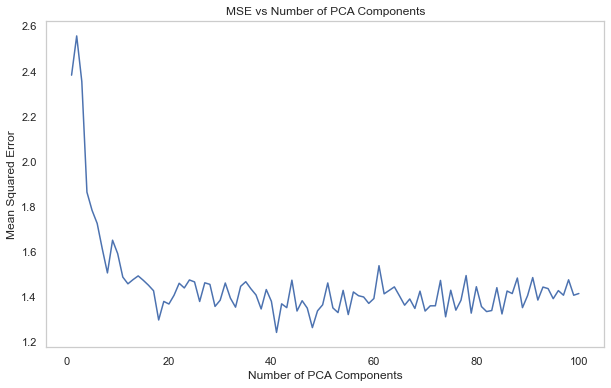

In [46]:
results = []
for n in range(1, 101):  # Example range
    pca = PCA(n_components=n)
    X_train_pca_reg = pca.fit_transform(X_trainReg)
    X_test_pca_reg = pca.transform(X_testReg)

    # Train model and evaluate
    dt_regressor_pca.fit(X_train_pca_reg, y_trainReg)
    y_pred_reg_pca = dt_regressor_pca.predict(X_test_pca_reg)
    
    mse_reg_pca = mean_squared_error(y_testReg, y_pred_reg_pca)
    results.append((n, mse_reg_pca))

# Plot the results
components, mse_values = zip(*results)
plt.figure(figsize=(10, 6))
plt.plot(components, mse_values)
plt.title('MSE vs Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Squared Error')
plt.grid()
plt.show()


Interpretation:

- Initial Drop: The plot shows a significant drop in MSE as the number of components increases from 0 to around 10. This indicates that using a few principal components significantly improves the model's performance.

- Elbow Point: Around 10 components, the MSE starts to plateau or even increase slightly. This point is often referred to as the "elbow point" and suggests that adding more components beyond this point does not significantly improve the model's performance.

_____________________________________________________________________________________________________________________________________________________________________________________________

## TASK 4: Feature Importance

In [47]:
# Extract feature importance
feature_importance = dt_regressor.feature_importances_

                             Feature  Importance
2                    num_voted_users    0.266920
5                         title_year    0.084937
4                             budget    0.080753
3               num_user_for_reviews    0.063453
0             num_critic_for_reviews    0.044241
1                              gross    0.038885
6                             profit    0.038044
9426                language_English    0.029639
2163  director_name_Steven Spielberg    0.024907
9548                    genre1_Drama    0.022135
9567                    genre2_Drama    0.020175
9547              genre1_Documentary    0.016584
9554                   genre1_Horror    0.016275
9589                    genre3_Drama    0.012378
9545                   genre1_Comedy    0.012010
9566              genre2_Documentary    0.010853
9604                 genre3_Thriller    0.010042
9531            content_rating_PG-13    0.009166
9544                genre1_Biography    0.006895
9572                

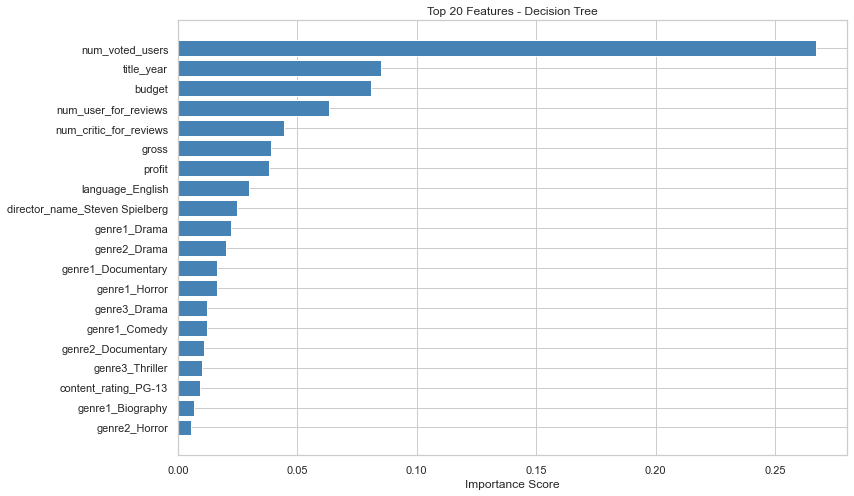

In [51]:
# Create a DataFrame to hold feature names and their importance scores
features = xImputedEncoded.columns  # Ensure this is your original DataFrame's column names
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df[:20])

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20], color='steelblue')
plt.xlabel('Importance Score')
plt.title('Top 20 Features - Decision Tree')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

Refining the model with important features of threshold value 0.009

In [52]:
# Extract feature importances
feature_importances = dt_regressor.feature_importances_
feature_names = xImputedEncoded.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Set the threshold for importance
threshold = 0.009

# Filter features based on the threshold
important_features = importance_df[importance_df['Importance'] >= threshold]

# Display important features
print("Selected Important Features:")
print(important_features)

# Create a new dataset with the selected features
X_important = xImputedEncoded[important_features['Feature']]
y = yRegressor  # Assuming 'imdb_score' is your target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

# Train a new Decision Tree model
refined_model = DecisionTreeRegressor(random_state=42)
refined_model.fit(X_train, y_train)

# Make predictions
y_pred = refined_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Refined Model): {mse}")
print(f"R-squared (Refined Model): {r2}")

Selected Important Features:
                             Feature  Importance
0             num_critic_for_reviews    0.044241
1                              gross    0.038885
2                    num_voted_users    0.266920
3               num_user_for_reviews    0.063453
4                             budget    0.080753
5                         title_year    0.084937
6                             profit    0.038044
2163  director_name_Steven Spielberg    0.024907
9426                language_English    0.029639
9531            content_rating_PG-13    0.009166
9545                   genre1_Comedy    0.012010
9547              genre1_Documentary    0.016584
9548                    genre1_Drama    0.022135
9554                   genre1_Horror    0.016275
9566              genre2_Documentary    0.010853
9567                    genre2_Drama    0.020175
9589                    genre3_Drama    0.012378
9604                 genre3_Thriller    0.010042
Mean Squared Error (Refined Model): 1.20